## Interactive Bootstrap Demonstration

### Boostrap for Uncertainty in Sample Statistics Tutorial

#### Bootstrap

Uncertainty in the sample statistics
* one source of uncertainty is the paucity of data.
* do 200 or even less wells provide a precise (and accurate estimate) of the mean? standard deviation? skew? P13?

Would it be useful to know the uncertainty in these statistics due to limited sampling?
* what is the impact of uncertainty in the mean porosity e.g. 20%+/-2%?

**Bootstrap** is a method to assess the uncertainty in a sample statistic by repeated random sampling with replacement.

Assumptions
* sufficient, representative sampling, identical, idependent samples

Limitations
1. assumes the samples are representative 
2. assumes stationarity
3. only accounts for uncertainty due to too few samples, e.g. no uncertainty due to changes away from data
4. does not account for boundary of area of interest 
5. assumes the samples are independent
6. does not account for other local information sources

The Bootstrap Approach (Efron, 1982)

Statistical resampling procedure to calculate uncertainty in a calculated statistic from the data itself.
* Does this work?  Prove it to yourself, for uncertainty in the mean solution is standard error: 

\begin{equation}
\sigma^2_{\overline{x}} = \frac{\sigma^2_s}{n}
\end{equation}

Extremely powerful - could calculate uncertainty in any statistic!  e.g. P13, skew etc.
* Would not be possible access general uncertainty in any statistic without bootstrap.
* Advanced forms account for spatial information and sampling strategy (game theory and Journel’s spatial bootstrap (1993).

Steps: 

1. assemble a sample set, must be representative, reasonable to assume independence between samples

2. optional: build a cumulative distribution function (CDF)
    * may account for declustering weights, tail extrapolation
    * could use analogous data to support

3. For $\ell = 1, \ldots, L$ realizations, do the following:

    * For $i = \alpha, \ldots, n$ data, do the following:

        * Draw a random sample with replacement from the sample set or Monte Carlo simulate from the CDF (if available). 

6. Calculate a realization of the sammary statistic of interest from the $n$ samples, e.g. $m^\ell$, $\sigma^2_{\ell}$. Return to 3 for another realization.

7. Compile and summarize the $L$ realizations of the statistic of interest.

This is a very powerful method.  Let's try it out.


#### Load the Required Libraries

The following code loads the required libraries.

In [1]:
%matplotlib inline
from ipywidgets import interactive                        # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
import matplotlib.pyplot as plt                           # plotting
import numpy as np                                        # working with arrays
import pandas as pd                                       # working with DataFrames
from scipy.stats import triang                            # parametric distributions
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import triang
from scipy import stats                                   # statistical calculations
import random                                             # random drawing / bootstrap realizations of the data

#### Make a Synthetic Dataset

This is an interactive method to:

* select a parametric distribution

* select the distribution parameters

* select the number of samples and visualize the synthetic dataset distribution

In [2]:
# parameters for the synthetic dataset
bins = np.linspace(0,1000,1000)

# interactive calculation of the sample set (control of source parametric distribution and number of samples)
l = widgets.Text(value='                                          Boostrap Demonstration, Michael Pyrcz, Professor, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))
dist = widgets.Dropdown(
    options=['Triangular', 'Uniform', 'Gaussian'],
    value='Gaussian',
    description='dist:',
    disabled=False,
    layout=Layout(width='200px', height='30px')
)
a = widgets.FloatSlider(min=0.0, max = 100.0, value = 50.0, description = 'Mean / Mode',orientation='vertical',layout=Layout(width='170px', height='200px'),continuous_update=False)
a.style.handle_color = 'blue'
d = widgets.FloatSlider(min=0.01, max = 30.0, value = 10.0, step = 1.0, description = 'St.Dev.',orientation='vertical',layout=Layout(width='130px', height='200px'),continuous_update=False)
d.style.handle_color = 'green'
b = widgets.FloatSlider(min = 0, max = 100.0, value = 0.0, description = 'Min',orientation='vertical',layout=Layout(width='130px', height='200px'),continuous_update=False)
b.style.handle_color = 'red'
c = widgets.IntSlider(min = 0, max = 100, value = 100, description = 'Max',orientation='vertical',layout=Layout(width='130px', height='200px'),continuous_update=False)
c.style.handle_color = 'orange'
n = widgets.IntSlider(min = 2, max = 1000, value = 100, description = 'n',orientation='vertical',layout=Layout(width='180px', height='200px'),continuous_update=False)
n.style.handle_color = 'gray'

ui = widgets.HBox([dist,a,d,b,c,n],)                      # basic widget formatting           
ui2 = widgets.VBox([l,ui],)

def f_make(dist,a, b, c, d, n):                           # function to take parameters, make sample and plot
    global df
    dataset = make_data(dist,a, b, c, d, n)
    df = pd.DataFrame({'DataSet':dataset})
    plt.subplot(111) 
    plt.hist(
        dataset,
        alpha=0.8,
        color="darkorange",
        edgecolor="black",
        bins=bins) 
    plt.xlim(0.0,100.0); plt.title('Synthetic Dataset'); plt.ylabel('Frequency'); plt.xlabel('Data Values')
            
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.6, wspace=0.2, hspace=0.3)
    plt.show()
    return df

def make_data(dist,a, b, c, d, n):                        # function to check parameters and make sample   
    if dist == 'Uniform':
        if b >= c:
            print('Invalid uniform distribution parameters')
            return None
        dataset = uniform.rvs(size=n, loc = b, scale = c, random_state = 73073).tolist()
        return dataset
    elif dist == 'Triangular':
        interval = c - b
        if b >= a or a >= c or interval <= 0:
            print('Invalid triangular distribution parameters')
            return None        
        dataset = triang.rvs(size=n, loc = b, c = (a-b)/interval, scale = interval, random_state = 73073).tolist()
        return dataset
    elif dist == 'Gaussian':
        dataset = norm.rvs(size=n, loc = a, scale = d, random_state = 73073).tolist()
        return dataset

# connect the function to make the samples and plot to the widgets    
interactive_plot = widgets.interactive_output(f_make, {'dist': dist,'a': a, 'd': d, 'b': b, 'c': c, 'n': n})
interactive_plot.clear_output(wait = True)                # reduce flickering by delaying plot updating

#### Display the GUI for Building the Synthetic Dataset

We display the GUI now.  Select the desired parametric distribution and associated parameters.

* if the parameters are invalid (e.g. traingular mode > max) an error message should display.

In [3]:
display(ui2, interactive_plot)                            # display the interactive plot

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 640x480 with 1 Axes>', 'i…

We now have a synthetic dataset to work with. Now we can:

* assign the samples to a 1D ndarray 

* make a DataFrame with the samples

* check the summary statistics

This is our sample set that we will apply ot bootstrap.

#### Perform Bootstrap 

Now we take our synthetic dataset, sampled from the parametric distributioin above, and apply it to statistical bootstrap.

* we calculate the sampling distributions / uncertainty in the mean and standard deviation

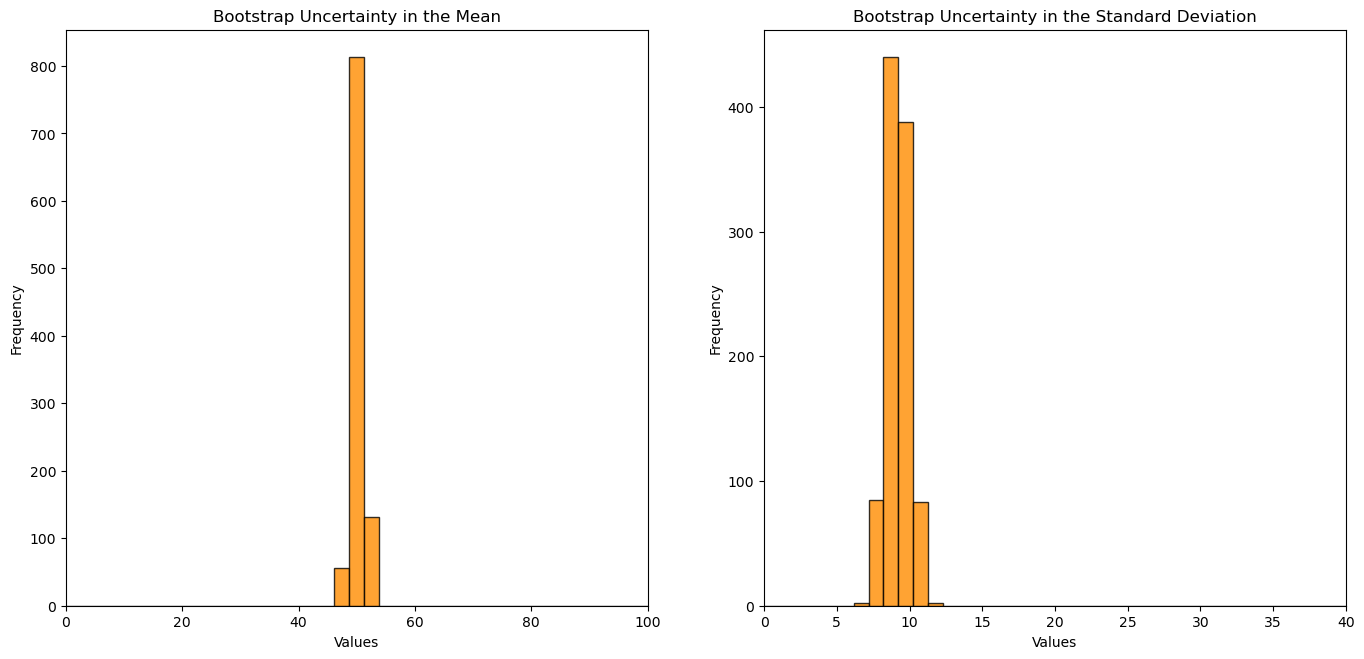

Summary Statistics for Bootstrap for Uncertainty in the Mean:
DescribeResult(nobs=1000, minmax=(46.840326719929315, 53.31555163749576), mean=50.231237682186396, variance=0.9142547903092512, skewness=-0.15724508351919114, kurtosis=0.3176351439448939)
P10: 49.023, P50: 50.231, P90: 51.402

Summary Statistics for Bootstrap for Uncertainty in the Standard Deviation:
DescribeResult(nobs=1000, minmax=(6.564849303592826, 11.384821054834566), mean=9.2309457851193, variance=0.5374445932646956, skewness=-0.010266567581127484, kurtosis=-0.18346888048755128)
P10: 8.278, P50: 9.198, P90: 10.196


In [4]:
L = 1000                                                  # set the number of realizations
mean = np.zeros(L); stdev = np.zeros(L)                   # declare arrays to hold the realizations of the statistics
for l in range(0, L):                                     # loop over realizations
    samples = random.choices(df['DataSet'].values, weights=None, cum_weights=None, k=len(df))
    mean[l] = np.average(samples)
    stdev[l] = np.std(samples)
    
plt.subplot(121)                                          # plot the distribution for uncertainty in the mean     
plt.hist(mean,alpha=0.8,color="darkorange",edgecolor="black",bins=np.linspace(0,100,40)); plt.xlim(0,100); plt.ylabel('Frequency'); plt.xlabel('Values'); plt.title('Bootstrap Uncertainty in the Mean')

plt.subplot(122)                                          # plot the distribution for uncertainty in the standard deviation
plt.hist(stdev,alpha=0.8,color="darkorange",edgecolor="black",bins=np.linspace(0,40,40)); plt.xlim(0,40); plt.ylabel('Frequency'); plt.xlabel('Values'); plt.title('Bootstrap Uncertainty in the Standard Deviation')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()   

# provide summary statistics, P10, P50 and P90
print('Summary Statistics for Bootstrap for Uncertainty in the Mean:') 
print(stats.describe(mean))
print('P10: ' + str(round(np.percentile(mean,10),3)) + ', P50: ' + str(round(np.percentile(mean,50),3)) + ', P90: ' + str(round(np.percentile(mean,90),3))) 

print('\nSummary Statistics for Bootstrap for Uncertainty in the Standard Deviation:')
print(stats.describe(stdev))
print('P10: ' + str(round(np.percentile(stdev,10),3)) + ', P50: ' + str(round(np.percentile(stdev,50),3)) + ', P90: ' + str(round(np.percentile(stdev,90),3)))

#### Change the Number of Data

Let's change the number of data drawn to observe the change in uncertainty

* we will assume the same dataset and not recalculate it each time

* we will just sample with replacement with the new number of samples for each bootstrap realization


In [5]:
# parameters for the synthetic dataset
bins = np.linspace(0,1000,1000)

l = widgets.Text(value='                                Boostrap Demonstration with Modified Number of Data, Michael Pyrcz, Professor, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))

n = widgets.IntSlider(min = 2, max = 1000, value = 100, description = 'new n',orientation='horizontal',layout=Layout(width='800px', height='20px'),continuous_update=False)
n.style.handle_color = 'gray'

ui3 = widgets.VBox([l,n],)

def f_rerun(n):
    L = 1000                                 # set the number of realizations
    mean2 = np.zeros(L); stdev2 = np.zeros(L)    # declare arrays to hold the realizations of the statistics
    for l in range(0, L):                      # loop over realizations
        samples = random.choices(df['DataSet'].values, weights=None, cum_weights=None, k=n)
        mean2[l] = np.average(samples)
        stdev2[l] = np.std(samples)
    
    plt.subplot(121)
    plt.hist(mean,alpha=0.5,color="red",edgecolor="black",bins=np.linspace(0,100,40),label='Original'); plt.xlim(0,100); plt.ylabel('Frequency'); plt.xlabel('Values'); plt.title('Bootstrap Uncertainty in the Mean')
    plt.hist(mean2,alpha=0.5,color="blue",edgecolor="black",bins=np.linspace(0,100,40),label='New'); plt.xlim(0,100); plt.ylabel('Frequency'); plt.xlabel('Values'); plt.title('Bootstrap Uncertainty in the Mean')
    plt.legend()

    plt.subplot(122)
    plt.hist(stdev,alpha=0.5,color="red",edgecolor="black",bins=np.linspace(0,40,40),label='Original'); plt.xlim(0,40); plt.ylabel('Frequency'); plt.xlabel('Values'); plt.title('Bootstrap Uncertainty in the Standard Deviation')
    plt.hist(stdev2,alpha=0.5,color="blue",edgecolor="black",bins=np.linspace(0,40,40),label='New'); plt.xlim(0,40); plt.ylabel('Frequency'); plt.xlabel('Values'); plt.title('Bootstrap Uncertainty in the Standard Deviation')
    plt.legend()
    
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)  
    plt.show()  

interactive_plot3 = widgets.interactive_output(f_rerun, {'n': n})
interactive_plot3.clear_output(wait = True)                # reduce flickering by delaying plot updating

#### Display the GUI for Modifying the Number of Data

We display the GUI now. Select the desired number of data

* observed the change (new) vs. the original (original) bootstrap uncertainty as the number of data ranges from less than to greater than the original number of data  

In [6]:
display(ui3, interactive_plot3)                            # display the interactive plot

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 640x480 with 2 Axes>', 'i…

#### Observations

Some observations form changing the number of data:

* with less data the uncertainty increases

* with more data the uncertianty decreases 

* there is a bias low in standard deviation with too few samples, as we fail to observe the dispersion well